In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font',family='serif',size='16')
fig = plt.figure(1,figsize=(7,5))
#fig = plt.figure(1,figsize=(7, 5)) ## To save figure.

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

<Figure size 504x360 with 0 Axes>

$HC = SCE$

$\chi_n = x^n(1-x)(1+x),\quad x\in[-1,1]$

$\langle m \vert H\vert n\rangle = -8\left[
\frac{1-m-n-2mn}{(m+n+3)(m+n+1)(m+n-1)}
\right]$


$\langle m \vert n\rangle = \frac{8 \left((-1)^{m+n}+1\right)}{(m+n+1) (m+n+3) (m+n+5)}$

In [2]:
def S(m,n):
    msn = m+n
    denominator = (msn+1)*(msn+3)*(msn+5)
    numerator = (1-(m+n)%2)*16.0
    return numerator/denominator


In [3]:
def H(m,n):
    msn = m+n
    denominator = (msn+3)*(msn+1)*(msn-1)
    numerator = 1-m-n-2*m*n
    y = 0.0
    if np.abs(denominator) > 0.0:
        y = -numerator*8*(1-(m+n)%2)/denominator
    return y

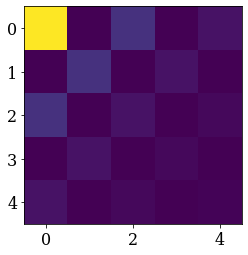

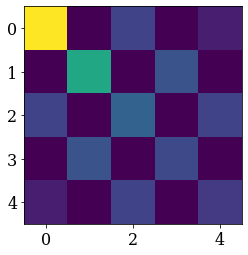

In [5]:
N_tot = 5
S_matrix = np.zeros((N_tot,N_tot))
H_matrix = np.zeros((N_tot,N_tot))
for i in range(N_tot):
    for j in range(N_tot):
        S_matrix[i,j] = S(i,j)
        H_matrix[i,j] = H(i,j)
        
plt.imshow(S_matrix)
plt.show()
plt.imshow(H_matrix)
plt.show()

$\begin{aligned}
& V^{\dagger}SV = I \\
& U^{\dagger}SU = s \\
& V = Us^{-1/2} \\
\end{aligned}$

In [5]:
from scipy import linalg

In [29]:
### def eig(h, s):
###    e, c = scipy.linalg.eigh(h, s)
###    idx = numpy.argmax(abs(c.real), axis=0)
###    c[:,c[idx,numpy.arange(len(e))].real<0] *= -1
###    return e, c


In [50]:
## Step 1: Calculate U and s.
small_S, U = np.linalg.eigh(S_matrix)

In [51]:
print(small_S)

[1.05186398e-03 5.52037488e-03 3.71457146e-02 1.69948601e-01
 1.09169475e+00]


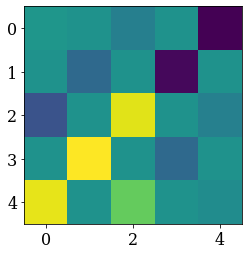

In [52]:
plt.imshow(U)

In [53]:
## Step 2: Calculate s^{-1/2}.
half_S = np.zeros((N_tot,N_tot))
for i in range(N_tot):
    half_S[i,i] = 1.0E0/np.sqrt(np.abs(small_S[i]))
    print(half_S[i,i])

30.833314136484738
13.459090533707926
5.188545637221286
2.4257229861330467
0.9570825297856045


In [54]:
## Step 3: Calculate V = Us^{-1/2}.
V = np.dot(U,half_S)

$\begin{aligned}
& H'=V^{\dagger}HV \\
& H'C'=EC' \\
& C=VC' \\
\end{aligned}$

In [55]:
with np.printoptions(precision=3, suppress=True):
    print(np.dot(np.transpose(U),U))

[[ 1. -0.  0. -0. -0.]
 [-0.  1.  0.  0. -0.]
 [ 0.  0.  1. -0.  0.]
 [-0.  0. -0.  1. -0.]
 [-0. -0.  0. -0.  1.]]


In [56]:
## Step 4: Calculate H' = V^d H V.
Vd = np.transpose(V)
tmp = np.dot(H_matrix,V)
H_prime = np.dot(Vd,tmp)

In [57]:
with np.printoptions(precision=3, suppress=True):
    print(np.dot(Vd,np.dot(S_matrix,V)))

[[ 1. -0.  0.  0. -0.]
 [-0.  1.  0. -0. -0.]
 [ 0.  0.  1.  0. -0.]
 [ 0.  0.  0.  1. -0.]
 [-0. -0. -0. -0.  1.]]


In [58]:
### Step 5: Calculate the eigenvalue problem.
EE, C_prime = linalg.eigh(H_prime)

In [127]:
for i in range(N_tot):
    print('{:12.3f}'.format(EE[i]))

       2.467
       9.875
      22.293
      50.125
      87.739


In [60]:
### Step 6: Obtain the coefficients C.
C = np.dot(V,C_prime)

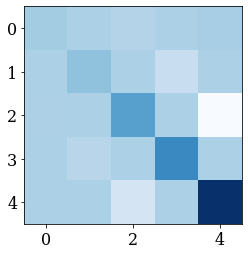

In [130]:
plt.imshow(C,cmap='Blues')
plt.show()

In [91]:
### Step 7: Construct the wavefunctions.
interval = 0.01
x = np.arange(-1,1+interval,interval)
def basis_f(x,n):
    y = x**n*(x-1)*(x+1)
    return y


y_tot = np.zeros((len(x),N_tot))
for j in range(N_tot):
    for i in range(N_tot):
        y_tot[:,j] += basis_f(x,i)*C[i,j]

    
    

7.209006741329651


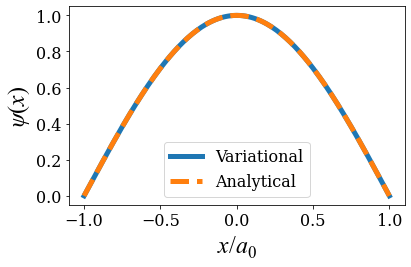

In [111]:
plt.plot(x,-(y_tot[:,0]),'-',lw=5,label='Variational')
plt.plot(x,np.sin(1*np.pi*(x+1)/2.0),'--',lw=5,label='Analytical')
plt.legend(loc='best')
plt.xlabel(r"$x/a_0$",fontsize=24)
plt.ylabel(r"$\psi(x)$",fontsize=24)
figname = "N5_G.png"
plt.tight_layout()
plt.savefig(figname,dpi=400,format='png')
plt.show()

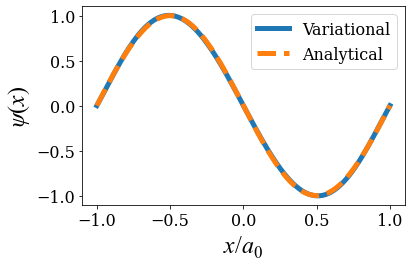

In [112]:
plt.plot(x,(y_tot[:,1]),'-',lw=5,label="Variational")
plt.plot(x,np.sin(2*np.pi*(x+1)/2.0),'--',lw=5,label="Analytical")
plt.legend(loc='best')
plt.xlabel(r"$x/a_0$",fontsize=24)
plt.ylabel(r"$\psi(x)$",fontsize=24)
figname = "N5_1.png"
plt.tight_layout()
plt.savefig(figname,dpi=400,format='png')
plt.show()

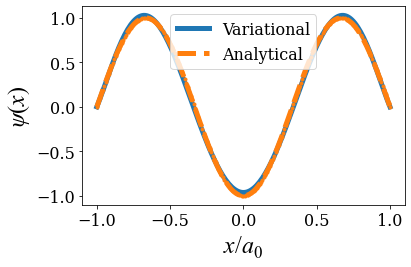

In [113]:
plt.plot(x,-(y_tot[:,2]),'-',lw=5,label="Variational")
plt.plot(x,np.sin(3*np.pi*(x+1)/2.0),'--.',lw=5,label="Analytical")
plt.legend(loc='best')
plt.xlabel(r"$x/a_0$",fontsize=24)
plt.ylabel(r"$\psi(x)$",fontsize=24)
figname = "N5_2.png"
plt.tight_layout()
plt.savefig(figname,dpi=400,format='png')
plt.show()

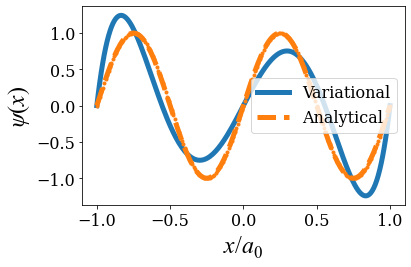

In [114]:
plt.plot(x,(y_tot[:,3]),'-',lw=5,label="Variational")
plt.plot(x,np.sin(4*np.pi*(x+1)/2.0),'--.',lw=5,label="Analytical")
plt.legend(loc='best')
plt.xlabel(r"$x/a_0$",fontsize=24)
plt.ylabel(r"$\psi(x)$",fontsize=24)
figname = "N5_3.png"
plt.tight_layout()
plt.savefig(figname,dpi=400,format='png')
plt.show()

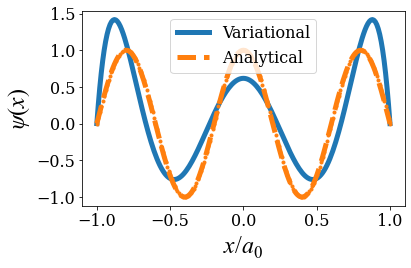

In [115]:
plt.plot(x,-(y_tot[:,4]),'-',lw=5,label="Variational")
plt.plot(x,np.sin(5*np.pi*(x+1)/2.0),'--.',lw=5,label="Analytical")
plt.legend(loc='best')
plt.xlabel(r"$x/a_0$",fontsize=24)
plt.ylabel(r"$\psi(x)$",fontsize=24)
figname = "N5_4.png"
plt.tight_layout()
plt.savefig(figname,dpi=400,format='png')
plt.show()

# Exercise: Try $N_{tot} = 16$

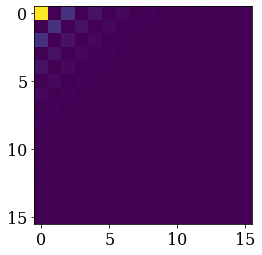

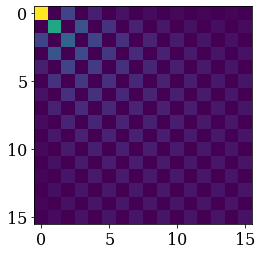

In [6]:
N_tot = 16
S_matrix = np.zeros((N_tot,N_tot))
H_matrix = np.zeros((N_tot,N_tot))
for i in range(N_tot):
    for j in range(N_tot):
        S_matrix[i,j] = S(i,j)
        H_matrix[i,j] = H(i,j)
        
plt.imshow(S_matrix)
plt.show()
plt.imshow(H_matrix)
plt.show()

In [6]:
## Step 1: Calculate U and s.
small_S, U = np.linalg.eigh(S_matrix)
## Step 2: Calculate s^{-1/2}.
half_S = np.zeros((N_tot,N_tot))
for i in range(N_tot):
    half_S[i,i] = 1.0E0/np.sqrt(np.abs(small_S[i]))
    #print(half_S[i,i])
## Step 3: Calculate V = Us^{-1/2}.
V = np.dot(U,half_S)
## Step 4: Calculate H' = V^d H V.
Vd = np.transpose(V)
tmp = np.dot(H_matrix,V)
H_prime = np.dot(Vd,tmp)
### Step 5: Calculate the eigenvalue problem.
EE, C_prime = np.linalg.eigh(H_prime)


In [8]:

for i in range(N_tot):
    print('{:12.4f}'.format(EE[i]))

      2.4674
      9.8696
     22.2066
     39.4784
     61.6850
     88.8264
    120.9038
    157.9202
    200.4780
    248.3611
    322.1853
    394.7388
    647.2233
    801.0344
   2422.8507
   3019.7711


In [9]:
### Step 6: Obtain the coefficients C.
C = np.dot(V,C_prime)

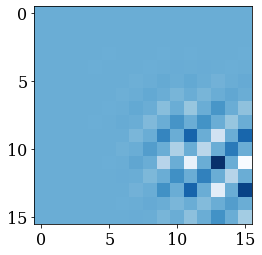

In [10]:
plt.imshow(C,cmap='Blues')
plt.show()

In [11]:
### Step 7: Construct the wavefunctions.
interval = 0.01
x = np.arange(-1,1+interval,interval)
def basis_f(x,n):
    y = x**n*(x-1)*(x+1)
    return y


y_tot = np.zeros((len(x),N_tot))
for j in range(N_tot):
    for i in range(N_tot):
        y_tot[:,j] += basis_f(x,i)*C[i,j]

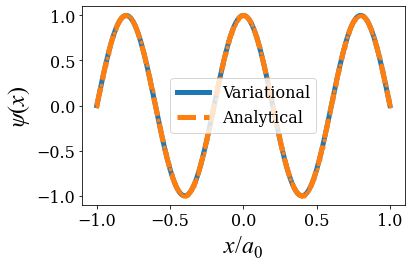

In [14]:
plt.plot(x,(y_tot[:,4]),'-',lw=5,label="Variational")
plt.plot(x,np.sin(5*np.pi*(x+1)/2.0),'--.',lw=5,label="Analytical")
plt.legend(loc='best')
plt.xlabel(r"$x/a_0$",fontsize=24)
plt.ylabel(r"$\psi(x)$",fontsize=24)
figname = "N5_4b.png"
plt.tight_layout()
plt.savefig(figname,dpi=400,format='png')
plt.show()

# H atom.
$HC = SCE$

$\left[
-\frac{1}{2}\nabla^2 - \frac{1}{r}
\right]\psi(\boldsymbol{r}) = E \psi(\boldsymbol{r})$

$\chi_p(\boldsymbol{r}) = e^{-\alpha_p r^2}$

$\begin{aligned}
\alpha_1 & = 13.00773 \\
\alpha_2 & = 1.962079 \\
\alpha_3 & = 0.444529 \\
\alpha_4 & = 0.1219492 \\
\end{aligned}$

$\begin{aligned}
S_{pq} & = \int {\rm{d}}^3 r \, e^{-\alpha_p r^2} e^{-\alpha_q r^2} = \left(\frac{\pi}{\alpha_p+\alpha_q}\right)^{3/2} \\
T_{pq} & = -\frac{1}{2}\int{\rm{d}}^3 r \, e^{-\alpha_p r^2}\nabla^2 e^{-\alpha_q r^2}
= 3\frac{\alpha_p \alpha_q \pi^{3/2}}{(\alpha_p + \alpha_q)^{5/2}} \\
A_{pq} &  = -\int{\rm{d}}^3 r \,  e^{-\alpha_p r^2} \frac{1}{r} e^{-\alpha_q r^2} = -\frac{2\pi}{\alpha_p + \alpha_q} \\
h_{pq} & = T_{pq} + A_{pq} \\
\end{aligned}$

In [2]:
###########################
### H atom.
###########################

def calc_S(Alpha,N_tot):
    S = np.zeros((N_tot,N_tot))
    for i in range(N_tot):
        for j in range(N_tot):
            y = np.pi/(Alpha[i]+Alpha[j])
            S[i,j] = y*np.sqrt(y)
            
    return S
def calc_T(Alpha,N_tot):
    T = np.zeros((N_tot,N_tot))
    for i in range(N_tot):
        for j in range(N_tot):
            y = 3.0E0*Alpha[i]*Alpha[j]*np.pi*np.sqrt(np.pi)
            z = (Alpha[i]+Alpha[j])**2*np.sqrt(Alpha[i]+Alpha[j])
            T[i,j] = y/z
    return T
def calc_A(Alpha,N_tot):
    A = np.zeros((N_tot,N_tot))
    for i in range(N_tot):
        for j in range(N_tot):
            A[i,j] = -2.0E0*np.pi/(Alpha[i]+Alpha[j])
    return A

def calc_H(Alpha,N_tot):
    H = np.zeros((N_tot,N_tot))
    T = calc_T(Alpha,N_tot)
    A = calc_A(Alpha,N_tot)
    H = np.add(T,A)
    return H

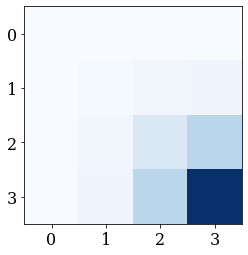

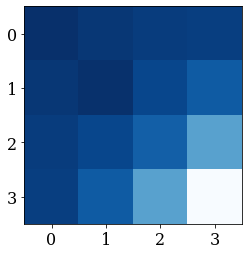

In [3]:
N_tot = 4
Alpha = np.array([13.00773,1.962079,0.444529,0.1219492],dtype=float)


S_matrix = calc_S(Alpha,N_tot)
H_matrix = calc_H(Alpha,N_tot)
        
plt.imshow(S_matrix,cmap='Blues')
plt.show()
plt.imshow(H_matrix,cmap='Blues')
plt.show()

In [4]:
## Step 1: Calculate U and s.
small_S, U = np.linalg.eigh(S_matrix)
## Step 2: Calculate s^{-1/2}.
half_S = np.zeros((N_tot,N_tot))
for i in range(N_tot):
    half_S[i,i] = 1.0E0/np.sqrt(np.abs(small_S[i]))
    #print(half_S[i,i])
## Step 3: Calculate V = Us^{-1/2}.
V = np.dot(U,half_S)
## Step 4: Calculate H' = V^d H V.
Vd = np.transpose(V)
tmp = np.dot(H_matrix,V)
H_prime = np.dot(Vd,tmp)
### Step 5: Calculate the eigenvalue problem.
EE, C_prime = np.linalg.eigh(H_prime)

for i in range(N_tot):
    print('{:12.4f}'.format(EE[i]))

     -0.4993
      0.1132
      2.5923
     21.1444


In [5]:
### Step 6: Obtain the coefficients C.
C = np.dot(V,C_prime)

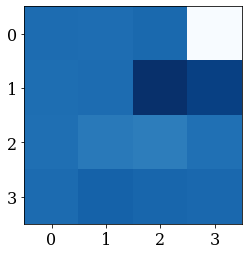

In [6]:
plt.imshow(C,cmap='Blues')
plt.show()

In [20]:
### Step 7: Construct the wavefunctions.
interval = 0.01
x = np.arange(0.0,2+interval,interval)
def basis_f(x,n):
    y = np.exp(-Alpha[n]*x)
    return y


y_tot = np.zeros((len(x),N_tot))
for j in range(N_tot):
    for i in range(N_tot):
        y_tot[:,j] += basis_f(x,i)*C[i,j]

In [ ]:
#hh = 1.0E-3
#Int_y = 0.0
#N_int = 
#for i in range()

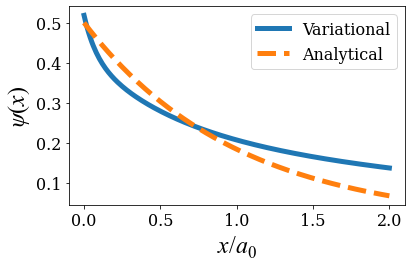

In [21]:
plt.plot(x,-(y_tot[:,0]),'-',lw=5,label="Variational")
plt.plot(x,np.exp(-x)/2,'--',lw=5,label="Analytical")
plt.legend(loc='best')
plt.xlabel(r"$x/a_0$",fontsize=24)
plt.ylabel(r"$\psi(x)$",fontsize=24)
figname = "H_N4_g.png"
plt.tight_layout()
plt.savefig(figname,dpi=400,format='png')
plt.show()